- Matplotlib colormap : https://matplotlib.org/tutorials/colors/colormaps.html
- Seaborn colormap : https://seaborn.pydata.org/tutorial/color_palettes.html
- How to choose a color palette for choropleth maps : https://blog.datawrapper.de/how-to-choose-a-color-palette-for-choropleth-maps/

In [80]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [81]:
fuel_econ = pd.read_csv('fuel_econ.csv')

In [82]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0],200,replace=True)
fuel_econ_subset = fuel_econ.loc[sample]

In [83]:
fuel_econ_subset.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
1274,34649,Kia,K900,2015,Large Cars,Rear-Wheel Drive,Automatic 8-spd,Regular Gasoline,6,3.8,0,110,17.7469,22.2,26.2583,37.1000,20.7776,428,5,5
2662,37387,Lincoln,MKZ FWD,2017,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.0,0,99,20.9627,26.6,31.1035,44.7000,24.0000,370,5,5
2274,36581,Chrysler,200,2016,Midsize Cars,Front-Wheel Drive,Automatic 9-spd,Regular Gasoline,4,2.4,0,101,22.9620,29.4,36.0000,52.1952,27.3605,326,7,7
2825,37743,Audi,A5 quattro,2017,Subcompact Cars,All-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,84,0,22.6211,28.2,32.2244,44.4000,26.1246,338,6,6
917,34008,MINI,Cooper S Countryman,2014,Compact Cars,Front-Wheel Drive,Manual 6-spd,Premium Gasoline,4,1.6,0,0,26.1013,33.9,31.6040,45.5000,28.3202,313,7,7


In [84]:
trans_new=fuel_econ_subset['trans'].str.extract('(Automatic)|(Manual)',expand=True)
# extract necessary string 'Automatic' & 'Manual'
trans_new =trans_new.fillna('').sum(axis=1)
# merge columns within in same table 
trans_new = pd.DataFrame(data=trans_new,columns=['trans_new'])
# make it from Series to DataFrame

In [85]:
fuel_econ_subset=fuel_econ_subset.drop(columns='trans')
#drop old trans columns 

In [86]:
fuel_econ_subset=pd.concat([fuel_econ_subset,trans_new],axis=1)
# new dataset with tran_new (Automatic / Manual)

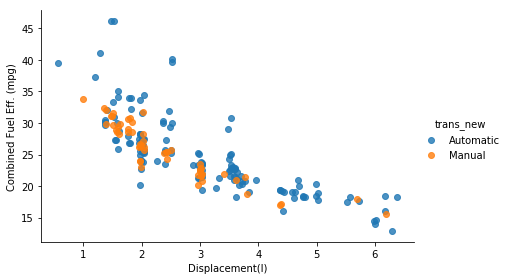

In [89]:
g = sns.FacetGrid(data=fuel_econ_subset,hue='trans_new',hue_order=['Automatic','Manual'],size=4 ,aspect=1.5)
g = g.map(sns.regplot,'displ','comb',x_jitter=0.04,fit_reg=False)
g.add_legend()
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.show()

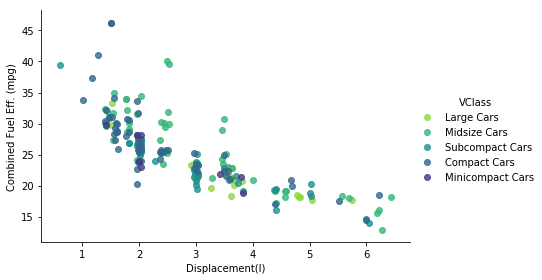

In [91]:
g = sns.FacetGrid(data=fuel_econ_subset,hue='VClass',size=4 ,aspect=1.5,palette='viridis_r')
# In this case hue_order is not necessary because VClass is categoriacal data 
g = g.map(sns.regplot,'displ','comb',x_jitter=0.04,fit_reg=False)
g.add_legend()
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.show()

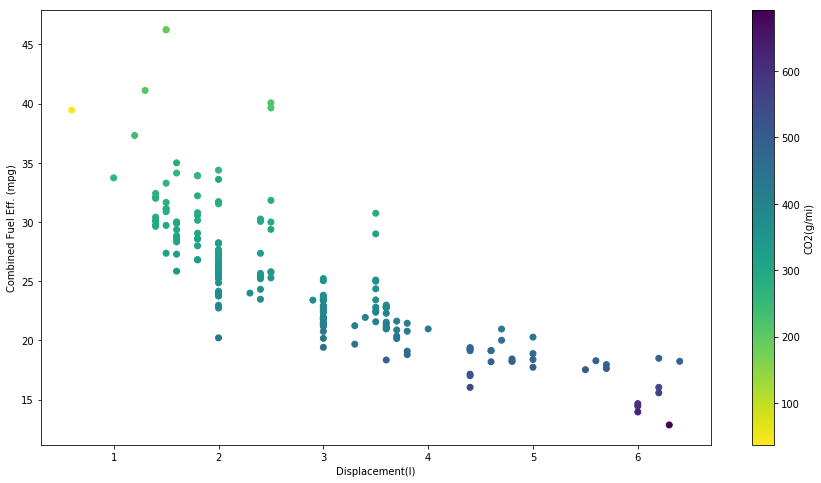

In [100]:
# palette with numeric data !!!! -> use colorbar !!!! 
# before you use colorbar you have to know that it's not allowed to use colorbar in seaborn directly !! 
# indirectly is possible 
plt.subplots(figsize=(15,8))
plt.scatter(x='displ',y='comb',data=fuel_econ_subset,c='co2',cmap='viridis_r')
# c=hue
plt.colorbar(label='CO2(g/mi)')
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.show()

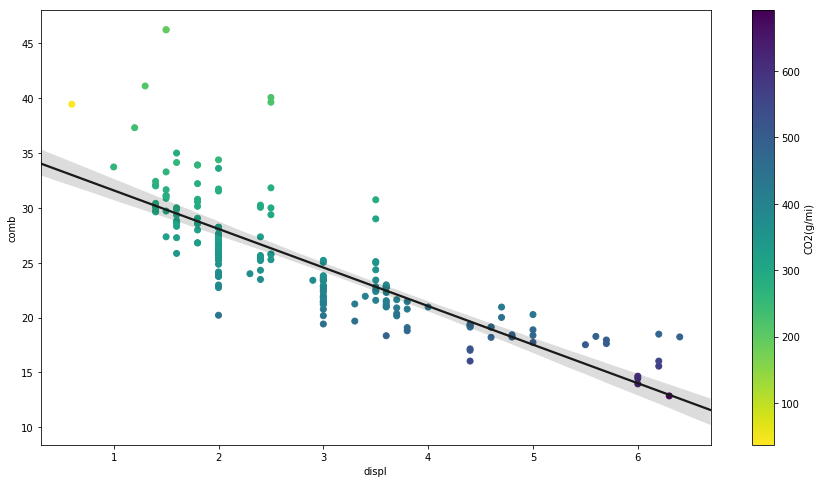

In [103]:
plt.subplots(figsize=(15,8))
plt.scatter(x='displ',y='comb',data=fuel_econ_subset,c='co2',cmap='viridis_r')
plt.colorbar(label='CO2(g/mi)')
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
sns.regplot('displ','comb',data=fuel_econ_subset,scatter=False,color=".1")
# like this you can use seaborn with colobar indirectly
# you have to scatter=False. Otherwise fuction show two times scatterpoints because regplot contains regression and scatterplot 
plt.show()